In [57]:
%%capture
!pip install geotiff-crop-dataset
!pip install rasterio

In [58]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import rasterio
from rasterio.warp import transform
import copy
import zipfile
import os
import numpy as np
import re
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt


# Extract the files

In [60]:
# Specify the path to the zip file
zip_file_pathMODIS_NPP_2015 = "//content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/MODIS_NPP_2015_Redux.zip"
zip_file_pathElevation = "/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/Elevation_Redux.zip"
zip_file_pathCoordinates = "/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/CoordinatesPoints/1MilCoordinatesMLTRANS_Redux.zip"
zip_file_pathLAI = "/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/LAI_2015_Redux.zip"
zip_file_LST = "/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/LST_2015_Redux.zip"
zip_file_PML = "/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/TotalEvapo_2015_Redux.zip"
zip_file_Es = "/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/SoilEvaporation_2015_Redux.zip"

In [61]:

# Function to extract all elements from a zip file
def extract_zip_file(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_file_name = os.path.basename(zip_file_path)
        zip_file_name_without_extension = os.path.splitext(zip_file_name)[0]
        zip_ref.extractall("/content/"+zip_file_name_without_extension)

# Call the function to extract all elements from the zip file
extract_zip_file(zip_file_pathElevation)
extract_zip_file(zip_file_pathCoordinates)
extract_zip_file(zip_file_pathMODIS_NPP_2015)


In [62]:
extract_zip_file(zip_file_pathLAI)
extract_zip_file(zip_file_LST)
extract_zip_file(zip_file_PML)
extract_zip_file(zip_file_Es)

# Sample Coordinates

In [63]:
eu_countries = [ # list of EU countries in the LUCAS SOIL dataset
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Denmark',
    'Estonia', 'France', 'Germany', 'Greece','United Kingdom' ,'Hungary', 'Czechia', 'Ireland', 'Italy', 'Latvia', 'Finland',
    'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

eu_countries_landArea = np.array([83871,30688,110994,56594,9251,42952,
                         45339,551695,357588,131957,243610,93026,78867,84421,302073,64589,338462,
                         65300,2586,316,41850,322575,92152,238397,
                         49035,20273,505990,528447])

percentages = (eu_countries_landArea / np.sum(eu_countries_landArea))

eu_dict = {country: percentage for country, percentage in zip(eu_countries, percentages)}
print(eu_dict)

{'Austria': 0.018667461402417772, 'Belgium': 0.006830335342578443, 'Bulgaria': 0.02470432224368325, 'Croatia': 0.01259632424328351, 'Cyprus': 0.002059027380545919, 'Denmark': 0.009559976656492091, 'Estonia': 0.01009125958345816, 'France': 0.12279268302997308, 'Germany': 0.0795896100913041, 'Greece': 0.02937013037019759, 'United Kingdom': 0.05422112854554009, 'Hungary': 0.020705121727668866, 'Czechia': 0.01755370364517512, 'Ireland': 0.018789876823377696, 'Italy': 0.0672334426465947, 'Latvia': 0.014375799317055495, 'Finland': 0.07533266947079591, 'Lithuania': 0.014534049070332778, 'Luxembourg': 0.0005755750520042965, 'Malta': 7.033322367879262e-05, 'Netherlands': 0.009314700667586934, 'Poland': 0.07179664439299535, 'Portugal': 0.020510592495088915, 'Romania': 0.05306085292833267, 'Slovakia': 0.010913891212308848, 'Slovenia': 0.004512232416582793, 'Spain': 0.1126199615482034, 'Sweden': 0.11761829447274343}


In [64]:
import os

directory = '/content/1MilCoordinatesMLTRANS_Redux'

# Initialize an empty dictionary to store the results
subfolder_arrays = {}

# Iterate over subfolders in the directory
for subdir in os.listdir(directory):
    subfolder_path = os.path.join(directory, subdir)

    # Check if the subfolder is a directory
    if os.path.isdir(subfolder_path):
        arrays = []

        # Iterate over files in the subfolder
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)

            # Check if the file is a .npy file
            if os.path.isfile(file_path) and file.endswith('.npy'):
                # Load the .npy file as a NumPy array
                array = np.load(file_path)

                # Append the array to the arrays list
                arrays.append(array)
        print(subdir)
        if subdir == ".config" or subdir == ".ipynb_checkpoints":
          continue
        # Concatenate all arrays in the subfolder into a single NumPy array
        subfolder_arrays[subdir] = np.concatenate(arrays, axis=0)

# Print the dictionary of subfolder arrays
for subdir, array in subfolder_arrays.items():
    print(subdir, "-", array)


France
Estonia
Germany
Portugal
.ipynb_checkpoints
Latvia
United Kingdom
Netherlands
Croatia
Luxembourg
Finland
Malta
Ireland
Slovenia
Cyprus
Romania
Lithuania
Belgium
Italy
Greece
Denmark
Poland
Czechia
Sweden
Hungary
Slovakia
Spain
Bulgaria
.config
France - [[ 1.30864938 44.987418  ]
 [-1.31286863 43.22488947]
 [ 7.37752727 43.89432073]
 ...
 [ 6.39937749 45.53769444]
 [ 4.75069342 47.32031439]
 [-0.48212455 45.87788335]]
Estonia - [[27.05290488 58.7081071 ]
 [27.48965426 57.72583057]
 [22.60235566 58.42842974]
 ...
 [27.3377961  58.00458868]
 [25.53044093 58.20630862]
 [25.12360316 58.46946956]]
Germany - [[ 8.61612718 50.72460222]
 [14.6775815  51.4877432 ]
 [ 6.27165892 51.78310846]
 ...
 [11.27948177 47.9659608 ]
 [ 9.93143633 48.28578102]
 [10.95376125 53.11702521]]
Portugal - [[-8.88905168 38.67689395]
 [-7.02826307 40.23287909]
 [-8.74529308 41.81618456]
 ...
 [-7.97329754 41.51796822]
 [-8.22996805 41.28835722]
 [-8.53992111 37.77518679]]
Latvia - [[22.29337438 56.58901409]
 

In [65]:

# Assuming you have the 'eu_dict' and 'subfolder_arrays' dictionaries defined

# Get the list of countries and their corresponding percentages
countries = list(eu_dict.keys())
percentages = list(eu_dict.values())

# Calculate the number of samples for each country based on the percentages
num_samples = np.round(np.array(percentages) * 1000000).astype(int)

# Initialize an empty array to store the sampled coordinates
sampled_coordinates = np.empty((0, 2), dtype=np.float64)

# Iterate over the countries and sample coordinates for each country
for country, num_sample in zip(countries, num_samples):
    if country in subfolder_arrays:
        coordinates = subfolder_arrays[country]
        indices = np.random.choice(range(len(coordinates)), size=num_sample, replace=False)
        sampled_coordinates = np.vstack((sampled_coordinates, coordinates[indices]))

# Print the shape of the sampled_coordinates array
print(sampled_coordinates.shape)


(981333, 2)


In [66]:
sampled_coordinates

array([[ 5.95378975, 50.22057771],
       [ 4.69331492, 50.36751232],
       [ 5.08775564, 50.77214482],
       ...,
       [15.98245034, 58.49800392],
       [16.10511169, 63.05207942],
       [14.96884519, 59.43206521]])

In [67]:
# np.random.shuffle(sampled_coordinates)


# Get the LUCAS Data

In [68]:
!pip install pandas openpyxl


In [69]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/VaesSOC/FilteredOCLucas.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Display the DataFrame
df.head()  # You can use df.head() to display the first few rows of the DataFrame


,survey_date,point_ids,longitude,latitude,OC
0,2015-05-13,28382290,-8.060886,42.103559,85.4
1,2015-05-31,28542300,-7.898597,42.225261,14.7
2,2015-07-29,27922352,-8.774762,42.543712,23.2
3,2015-07-23,27942398,-8.881330,42.948813,89.4
4,2015-07-22,28002400,-8.815424,42.979714,55.3


# See the tif files of Evapo

In [70]:
import os
import rasterio

def check_same_values(raster_path):
    with rasterio.open(raster_path) as dataset:
        first_value = dataset.read(1)[0, 0]
        for i in range(1, dataset.count + 1):
            current_array = dataset.read(i)
            if not (current_array == first_value).all():
                return False
    return True

folder_path = '/content/TotalEvapo_2015_Redux/TotalEvapov2'
tif_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]

files_with_same_values = []
for tif_file in tif_files:
    tif_path = os.path.join(folder_path, tif_file)
    if check_same_values(tif_path):
        files_with_same_values.append(tif_file)

print("Files with the same value on all raster data:")
for file_name in files_with_same_values:
    print(file_name)


Files with the same value on all raster data:
ID474N34_13646201784612S32_339144865044645W-12_577032107816352E-10_776000087268802.tif
ID571N57_49365622187711S55_6921770601298W5_38619850241133E7_187230522958881.tif
ID400N43_122239331905796S41_320760170158486W-12_577032107816352E-10_776000087268802.tif
ID499N34_13646201784612S32_339144865044645W28_743392706442318E30_54442472698987.tif
ID21N71_86923512079426S70_06775595904695W3_5923726467560626E5_393404667303614.tif
ID237N34_13646201784612S32_339144865044645W16_16580167212627E17_966833692673823.tif
ID363N46_714053052162164S44_912573890414855W-8_985218387559982E-7_1841863670124315.tif
ID227N64_68144567133568S62_87996650958837W-3_595416802702511E-1_79438478215496.tif
ID342N71_86923512079426S70_06775595904695W8_982174231613534E10_783206252161085.tif
ID578N70_07124725619315S68_26976809444584W-5_393404667303614E-3_5923726467560626.tif
ID467N64_68144567133568S62_87996650958837W3_5923726467560626E5_393404667303614.tif
ID415N34_13646201784612S32_3

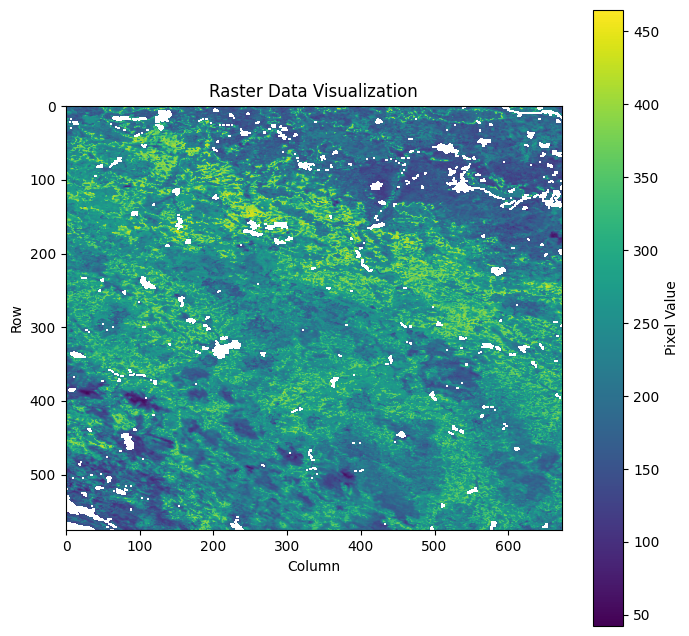

In [71]:
import rasterio
import matplotlib.pyplot as plt

file_path = '/content/TotalEvapo_2015_Redux/TotalEvapov2/ID12N44_91606518756106S43_118748034759584W17_963789536727376E19_764821557274928.tif'
with rasterio.open(file_path) as dataset:
    raster_data = dataset.read(1)  # Read the first band

plt.figure(figsize=(8, 8))
plt.imshow(raster_data, cmap='viridis')
plt.colorbar(label='Pixel Value')
plt.title('Raster Data Visualization')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()


# Making the Bounds

In [72]:

def build_kdtree_from_npy_file(file_path):
    # Load data from .npy file
    data = np.load(file_path)

    # Extract longitude and latitude columns
    longitude = data[:, 1]
    latitude = data[:, 2]

    # Build KD-tree
    tree = cKDTree(np.column_stack((longitude, latitude)))

    return tree

def find_closest_indices(tree, query_point, k=4):
    # Query the tree for k nearest neighbors
    distances, indices = tree.query(query_point, k=k)

    return indices


In [73]:
import os
import re
import numpy as np
import rasterio

# Folder containing .tif files
tif_folder = '/content/LAI_2015_Redux/LAI2015v2'

# Output .npy file
npy_file = 'output.npy'

# List to store data
data_list = []

# Iterate through .tif files in the folder
for filename in os.listdir(tif_folder):
    if filename.endswith('.tif'):
        # Extract ID from filename
        match = re.search(r'ID(\d+)N', filename)
        if match:
            image_id = int(match.group(1))
            tif_path = os.path.join(tif_folder, filename)

            # Open .tif file using rasterio
            with rasterio.open(tif_path) as src:
                # Get the center coordinates in the global CRS
                lon, lat = src.xy(src.height // 2, src.width // 2)

                # Append data to the list
                data_list.append([image_id, lat, lon])

# Convert the list to a numpy array
data_array = np.array(data_list)

# Save the numpy array as .npy file
np.save(npy_file, data_array)

print(f'Data saved to {npy_file}')


Data saved to output.npy


In [74]:
# building the KD tree
kdTreeElevation = build_kdtree_from_npy_file("/content/Elevation_Redux/bounds_array.npy")
kdTreeMODIS2015 = build_kdtree_from_npy_file("/content/MODIS_NPP_2015_Redux/bounds_array.npy")
kdTreeLAI2015 = build_kdtree_from_npy_file("/content/LAI_2015_Redux/bounds_array.npy")
kdTreeLST2015 =  build_kdtree_from_npy_file("/content/LST_2015_Redux/bounds_array.npy")
kdTreeEvapo2015 =  build_kdtree_from_npy_file("/content/TotalEvapo_2015_Redux/bounds_array.npy")
kdTreeEs2015 = build_kdtree_from_npy_file("/content/SoilEvaporation_2015_Redux/bounds_array.npy")
kdTrees = [kdTreeElevation,kdTreeMODIS2015,kdTreeLAI2015,kdTreeLST2015,kdTreeEvapo2015,kdTreeEs2015]

In [75]:
dataElevationBounds = np.load("/content/Elevation_Redux/bounds_array.npy")
dataMODIS2015Bounds = np.load("/content/MODIS_NPP_2015_Redux/bounds_array.npy")
dataLAI2015Bounds = np.load("/content/LAI_2015_Redux/bounds_array.npy")
dataLSTBounds = np.load("/content/LST_2015_Redux/bounds_array.npy")
dataEvapoBounds = np.load("/content/TotalEvapo_2015_Redux/bounds_array.npy")
dataEsBounds = np.load("/content/SoilEvaporation_2015_Redux/bounds_array.npy")
Bounds = [dataElevationBounds,dataMODIS2015Bounds,dataLAI2015Bounds,dataLSTBounds,dataEvapoBounds,dataEsBounds]

In [76]:
elevationPath = '/content/Elevation_Redux/Elevation'
MODIS2015Path = '/content/MODIS_NPP_2015_Redux/npp'
LAIPath = '/content/LAI_2015_Redux/LAI2015v2'
LSTPath = '/content/LST_2015_Redux/LST2015v2'
EvapoPath = '/content/TotalEvapo_2015_Redux/TotalEvapov2'
EsPath = '/content/SoilEvaporation_2015_Redux/SoilEvaporation'
Paths = [elevationPath,MODIS2015Path,LAIPath,LSTPath,EvapoPath,EsPath]

### Counting the number of files for all Zips

In [77]:
import os

def count_files_in_folders(paths_list):
    for folder_path in paths_list:
        if os.path.exists(folder_path):
            file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            print(f"Number of files in {folder_path}: {file_count}")
        else:
            print(f"Folder '{folder_path}' does not exist.")

# Example usage:
folder_paths = ["/content/sample_data", "/content/another_folder"]  # Add your folder paths here
count_files_in_folders(Paths)


Number of files in /content/Elevation_Redux/Elevation: 646
Number of files in /content/MODIS_NPP_2015_Redux/npp: 508
Number of files in /content/LAI_2015_Redux/LAI2015v2: 304
Number of files in /content/LST_2015_Redux/LST2015v2: 493
Number of files in /content/TotalEvapo_2015_Redux/TotalEvapov2: 646
Number of files in /content/SoilEvaporation_2015_Redux/SoilEvaporation: 485


# Getting the CRS of the Dataset

In [78]:
filenameMODIS2015 = '/content/MODIS_NPP_2015_Redux/npp/ID0N4828181_518937418S4561313_994217338W1410324_409110978E1699893_8569409258.tif'
# Open the GeoTIFF file
src_dataset = rasterio.open(filenameMODIS2015)

# Deep copy the source CRS
src_crsMODIS2015 = copy.deepcopy(src_dataset.crs)

# Close the source dataset
src_dataset.close()

filenameElevation = '/content/Elevation_Redux/Elevation/ID100N37_73124999999999S35_93124999999999W-5_391666666666665E-3_5916666666666655.tif'
# Open the GeoTIFF file
src_dataset = rasterio.open(filenameElevation)

# Deep copy the source CRS
src_crsElevation = copy.deepcopy(src_dataset.crs)

# Close the source dataset
src_dataset.close()

filenameLAI = '/content/LAI_2015_Redux/LAI2015v2/ID101N53_89985266735133S51_20303557463268W2_6918892932516325E5_392948263824062.tif'
# Open the GeoTIFF file
src_dataset = rasterio.open(filenameLAI)

# Deep copy the source CRS
src_crsLAI = copy.deepcopy(src_dataset.crs)

# Close the source dataset
src_dataset.close()


filenameLST = '/content/LST_2015_Redux/LST2015v2/ID100N46_71405305641136S44_90841188550078W1_7902227733257365E3_59541680307266.tif'
# Open the GeoTIFF file
src_dataset = rasterio.open(filenameLST)

# Deep copy the source CRS
src_crsLST = copy.deepcopy(src_dataset.crs)

# Close the source dataset
src_dataset.close()


filenameEvapo = '/content/TotalEvapo_2015_Redux/TotalEvapov2/ID0N43_122239331905796S41_320760170158486W17_963789536727376E19_764821557274928.tif'
# Open the GeoTIFF file
src_dataset = rasterio.open(filenameEvapo)

# Deep copy the source CRS
src_crsEvapo = copy.deepcopy(src_dataset.crs)

# Close the source dataset
src_dataset.close()

filenameEs = '/content/SoilEvaporation_2015_Redux/SoilEvaporation/ID0N43_12083333333334S41_32083333333333W17_9625E19_766666666666666.tif'
# Open the GeoTIFF file
src_dataset = rasterio.open(filenameEs)

# Deep copy the source CRS
src_crsEs = copy.deepcopy(src_dataset.crs)

# Close the source dataset
src_dataset.close()



# Test the function with a longitude and latitude
longitude = 2.3522
latitude = 48.8566

def transform_coordinates(lon, lat, crs=src_crsElevation):
    # Coordinates in the target CRS
    x, y = transform({'init': 'EPSG:4326'}, crs, [lon], [lat])
    return x[0], y[0]

# Transform coordinates using the deep copied source CRS
x, y = transform_coordinates(longitude, latitude, src_crsElevation)

# Print the transformed coordinates
print(f"X: {x}")
print(f"Y: {y}")


X: 2.3522
Y: 48.8566


In [79]:
crsDataset = [src_crsElevation,src_crsMODIS2015,src_crsLAI,src_crsLST,src_crsEvapo,src_crsEs]

In [80]:
latitude= 48.8566
longitude= 2.3522
x, y = transform_coordinates(longitude, latitude,src_crsEs)

indices = find_closest_indices(kdTreeEs2015,[y,x])

# Retrieve ID number from column 0 using the indices
id_number = dataElevationBounds[indices, 0]

id_number

array([351., 489., 492., 289.], dtype=float32)

# Fetch the right file

In [81]:

def generate_filename_dict(folder_path):
    filename_dict = {}

    # Iterate over the files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Extract the ID number from the filename
        match = re.search(r'ID(\d+)N', filename)
        if match:
            id_number = int(match.group(1))

            # Store the filename in the dictionary with the ID number as the key
            filename_dict[id_number] = file_path

    return filename_dict


In [82]:
elevationDictFilenames = generate_filename_dict(elevationPath)
Modis2015DictFilenames = generate_filename_dict(MODIS2015Path)
LAIDictFilenames = generate_filename_dict(LAIPath)
LSTDictFilenames = generate_filename_dict(LSTPath)
EvapoDictFilenames = generate_filename_dict(EvapoPath)
EsDictFilenames = generate_filename_dict(EsPath)
DictFilenames = [elevationDictFilenames,Modis2015DictFilenames,LAIDictFilenames,LSTDictFilenames,EvapoDictFilenames,EsDictFilenames]

### compute the tif file and get the indexes of the samples points with ID

In [83]:

def get_files_in_folder(folder_path):
    files = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            files.append(file_name)
    return files

In [84]:
def get_matching_file_names(file_names, id_list):
    matching_file_names = []
    pattern = r'ID(\d+)N'  # Regular expression pattern

    for file_name in file_names:
        match = re.search(pattern, file_name)
        if match:
            extracted_integer = int(match.group(1))
            if extracted_integer in id_list:
                matching_file_names.append(file_name)

    return matching_file_names

In [85]:
directory

'/content/1MilCoordinatesMLTRANS_Redux'

In [86]:

def get_tif_file( latitude, longitude,kdTree,DataBoundsArray,DictFilenames,src_crs):
    x, y = transform_coordinates(longitude, latitude,src_crs)
    index_list = find_closest_indices(kdTree,[y,x])
    id_list = DataBoundsArray[index_list, 0]
    # print(get_matching_file_names(files, id_list))

    for id in id_list:
        filename = DictFilenames[id]
        # Replace underscores with periods
        filenameTransformed = filename.replace('_', '.')

        # Extract the four floats using regular expressions
        coordinates = re.findall(r'[NSWE]-?\d+\.\d+|[NSWE]0', filenameTransformed)
        # Convert the strings to floats
        coordinates = [float(coord[1:]) for coord in coordinates]
        # coordinates = [0.0 if coord.endswith('0') else float(coord[1:]) if coord != 'E0' else 0.0 for coord in coordinates]

        # Check if the sampled coordinates match the filename
        if coordinates[3] >= y and coordinates[2]  <= y and coordinates[0] >= x and coordinates[1] <= x:
            return x,y, filename

    return None

In [87]:

def generate_transform_dict(folder_path):
    transform_dict = {}

    # Iterate over the files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Extract the ID number from the filename
        match = re.search(r'ID(\d+)N', filename)
        if match:
            id_number = int(match.group(1))

            # Read the rasterio src.transform
            with rasterio.open(file_path) as src:
                src_transform_copy = copy.deepcopy(src.transform)

            # Store the transform in the dictionary with the ID number as the key
            transform_dict[id_number] = src_transform_copy

    return transform_dict


In [88]:
elevationDictTransforms = generate_transform_dict(elevationPath)
Modis2015DictTransforms = generate_transform_dict(MODIS2015Path)
LAIDictTransforms = generate_transform_dict(LAIPath)
LSTDictTransforms = generate_transform_dict(LSTPath)
EvapoDictTransforms = generate_transform_dict(EvapoPath)
EsDictTransforms = generate_transform_dict(EsPath)
DictTransforms = [elevationDictTransforms,Modis2015DictTransforms,LAIDictTransforms,LSTDictTransforms,EvapoDictTransforms,EsDictTransforms]

In [89]:
def get_tif_ID( latitude, longitude,kdTree,DataBoundsArray,DictFilenames,src_crs):
    x, y = transform_coordinates(longitude, latitude,src_crs)
    index_list = find_closest_indices(kdTree,[y,x])
    id_list = DataBoundsArray[index_list, 0]

    for id in id_list:
        filename = DictFilenames[id]
        # Replace underscores with periods
        filenameTransformed = filename.replace('_', '.')
        # Open the raster file using rasterio
        #     # Read the raster data (assuming only one band)
        #                     # Check if all data points have the same value
        #     if (raster_data == raster_data[0]).all():
        #       print('All the same value for ',filename)
        #     else:
              # Extract the four floats using regular expressions
        coordinates = re.findall(r'[NSWE]-?\d+\.\d+|[NSWE]0', filenameTransformed)
              # Convert the strings to floats
        coordinates = [float(coord[1:]) for coord in coordinates]
              # coordinates = [0.0 if coord.endswith('0') else float(coord[1:]) if coord != 'E0' else 0.0 for coord in coordinates]

              # Check if the sampled coordinates match the filename
        if coordinates[3] >= x and coordinates[2]  <= x and coordinates[0] >= y and coordinates[1] <= y:
          return x,y, id
        else:
           print(coordinates,x,y,id)

    print('f')
    print(latitude, longitude)
    return 0,0,0

def get_tif_ArrayPosition( latitude, longitude,kdTree,DataBoundsArray,DictFilenames,src_crs,DictTransform):

  x_original,y_original, id = get_tif_ID( latitude, longitude,kdTree,DataBoundsArray,DictFilenames,src_crs)
  x, y = rasterio.transform.rowcol(DictTransform[id], x_original, y_original)
  if x < 0:
    print(x,y,id)
  if y < 0:
    print(y,x,id)
  return id, x , y


In [90]:
DictFilenames[5][0]

'/content/SoilEvaporation_2015_Redux/SoilEvaporation/ID0N43_12083333333334S41_32083333333333W17_9625E19_766666666666666.tif'

## plot the raster

/content/SoilEvaporation_2015_Redux/SoilEvaporation/ID220N62_88333333333333S61_08333333333333W17_9625E19_766666666666666.tif
17.4625 60.78333333333333 20.266666666666666 63.18333333333333
-inf


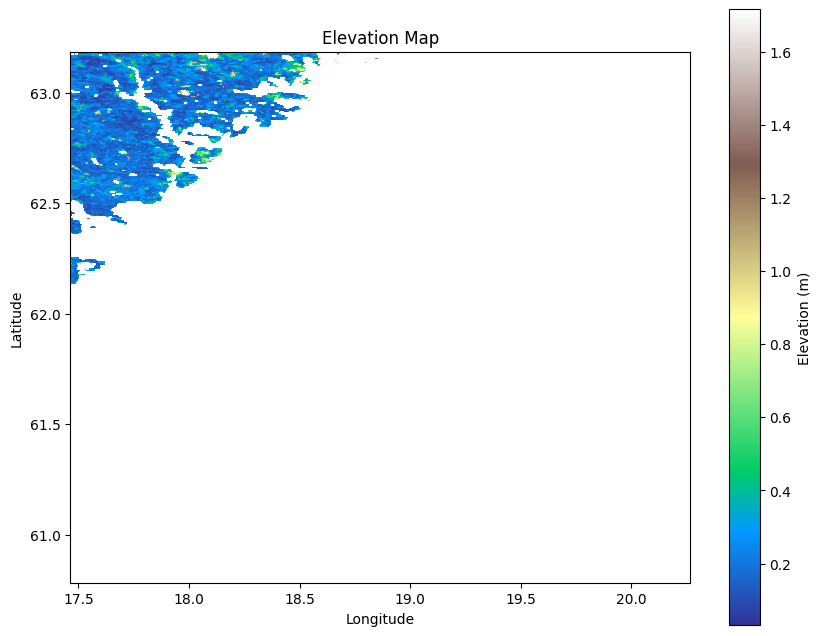

In [91]:

# Specify the path to the raster file
raster_file_path = DictFilenames[5][220]
# Open the raster file using rasterio
with rasterio.open(raster_file_path) as dataset:
    print(raster_file_path)
    # Read the raster data (assuming only one band)
    raster_data = dataset.read(1)

    # Get the spatial extent of the raster
    xmin, ymin, xmax, ymax = dataset.bounds

print(xmin, ymin, xmax, ymax)
print(np.mean(raster_data))
# Plot the raster data using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(raster_data, cmap='terrain', extent=[xmin, xmax, ymin, ymax])
plt.colorbar(label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Elevation Map')
plt.show()
# 22.759947123017323 62.4860366113768

# modify for LUCAS

In [92]:
df.head()

,survey_date,point_ids,longitude,latitude,OC
0,2015-05-13,28382290,-8.060886,42.103559,85.4
1,2015-05-31,28542300,-7.898597,42.225261,14.7
2,2015-07-29,27922352,-8.774762,42.543712,23.2
3,2015-07-23,27942398,-8.881330,42.948813,89.4
4,2015-07-22,28002400,-8.815424,42.979714,55.3


# Saving the ID, and array Position given the Band and coordinates of the raster data

In [93]:
Bounds[1]

array([[ 5.5200000e+02,  3.6958455e+06,  3.2594050e+06],
       [ 3.9600000e+02,  4.2953720e+06,  2.3605783e+05],
       [ 4.1500000e+02,  3.6958455e+06,  1.4219068e+06],
       ...,
       [ 9.4000000e+01,  6.0930255e+06,  2.2477618e+06],
       [ 3.6400000e+02,  5.0941235e+06, -7.1118500e+04],
       [ 6.1300000e+02,  6.2929450e+06, -5.6755809e+04]], dtype=float32)

In [94]:
import pandas as pd
import rasterio.transform  # Make sure you have this import in your code
# Import other necessary functions and libraries as needed

# Define a function to apply 'get_tif_ArrayPosition' to each row of the DataFrame
def process_row(row, kdTreeNum, DataBoundsArrayNum, DictFilenamesNum, src_crsNum, DictTransformNum):
    latitude = (row['latitude'])
    longitude = (row['longitude'])
    id, x, y = get_tif_ArrayPosition(latitude, longitude, kdTreeNum, DataBoundsArrayNum, DictFilenamesNum, src_crsNum, DictTransformNum)
    return pd.Series({'id': int(id), 'x': x, 'y': y, **row.drop(['latitude', 'longitude'])})


In [95]:
df

,survey_date,point_ids,longitude,latitude,OC
0,2015-05-13,28382290,-8.060886,42.103559,85.4
1,2015-05-31,28542300,-7.898597,42.225261,14.7
2,2015-07-29,27922352,-8.774762,42.543712,23.2
3,2015-07-23,27942398,-8.881330,42.948813,89.4
4,2015-07-22,28002400,-8.815424,42.979714,55.3
...,...,...,...,...,...
16724,2015-06-30,34983796,-3.468423,56.568999,48.3
16725,2015-05-14,34263752,-4.469495,56.056987,3.4
16726,2015-05-22,34103754,-4.728038,56.045482,25.5
16727,2015-07-07,35163814,-3.235858,56.757503,51.4


In [96]:
DictFilenames[0]

{269: '/content/Elevation_Redux/Elevation/ID269N35_93333333333332S34_13541666666666W-0_002083333333333298E1_7979166666666664.tif',
 305: '/content/Elevation_Redux/Elevation/ID305N50_306249999999984S48_50833333333332W25_152083333333326E26_949999999999996.tif',
 183: '/content/Elevation_Redux/Elevation/ID183N57_493749999999984S55_69374999999999W7_185416666666666E8_98333333333333.tif',
 561: '/content/Elevation_Redux/Elevation/ID561N53_899999999999984S52_10208333333332W-1_7979166666666664E0_0020833333333333537.tif',
 589: '/content/Elevation_Redux/Elevation/ID589N41_32291666666666S39_52499999999999W34_13541666666666E35_93333333333332.tif',
 229: '/content/Elevation_Redux/Elevation/ID229N71_86666666666666S70_06666666666665W35_93124999999999E37_731249999999996.tif',
 88: '/content/Elevation_Redux/Elevation/ID88N62_88333333333332S61_08541666666665W-1_7979166666666664E0_0020833333333333537.tif',
 494: '/content/Elevation_Redux/Elevation/ID494N66_47708333333333S64_67708333333331W23_35416666666

In [97]:

# Define the parameters you want to use in the 'process_row' function
kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum = kdTrees[0], Bounds[0], DictFilenames[0], crsDataset[0], DictTransforms[0]

# Apply the 'process_row' function to each row of the DataFrame
new_dfElevation = df.apply(process_row, axis=1, args=(kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum))

# 'new_df' now contains the results with 'id', 'x', 'y', and the rest of the columns

In [98]:

# Define the file path where you want to save the Excel file
excel_file_path = 'ElevationLucasData.xlsx'  # Replace with your desired file path

# Save the DataFrame as an Excel file
new_dfElevation.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column in the saved file

print(f'DataFrame saved as {excel_file_path}')

DataFrame saved as ElevationLucasData.xlsx


In [99]:
import shutil

In [100]:
destination_directory = '/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/LucasCoordinatesPointsTensor/'

# Move the file to the destination directory
shutil.move(excel_file_path, destination_directory)


'/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/LucasCoordinatesPointsTensor/ElevationLucasData.xlsx'

In [101]:
new_dfElevation

,id,x,y,survey_date,point_ids,OC
0,506,536.0,514.0,2015-05-13,28382290,85.4
1,506,477.0,592.0,2015-05-31,28542300,14.7
2,506,325.0,172.0,2015-07-29,27922352,23.2
3,506,130.0,120.0,2015-07-23,27942398,89.4
4,506,115.0,152.0,2015-07-22,28002400,55.3
...,...,...,...,...,...,...
16724,195,491.0,132.0,2015-06-30,34983796,48.3
16725,595,737.0,514.0,2015-05-14,34263752,3.4
16726,595,743.0,390.0,2015-05-22,34103754,25.5
16727,195,401.0,243.0,2015-07-07,35163814,51.4


In [102]:
i =1
# Define the parameters you want to use in the 'process_row' function
kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum = kdTrees[i], Bounds[i], DictFilenames[i], crsDataset[i], DictTransforms[i]

# Apply the 'process_row' function to each row of the DataFrame
new_dfModis2015 = df.apply(process_row, axis=1, args=(kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum))


In [103]:

# Define the file path where you want to save the Excel file
excel_file_path = 'NPPLucasData.xlsx'  # Replace with your desired file path

# Save the DataFrame as an Excel file
new_dfModis2015.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column in the saved file

print(f'DataFrame saved as {excel_file_path}')
# Move the file to the destination directory
shutil.move(excel_file_path, destination_directory)


DataFrame saved as NPPLucasData.xlsx


'/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/LucasCoordinatesPointsTensor/NPPLucasData.xlsx'

In [104]:
i =2
# Define the parameters you want to use in the 'process_row' function
kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum = kdTrees[i], Bounds[i], DictFilenames[i], crsDataset[i], DictTransforms[i]

# Apply the 'process_row' function to each row of the DataFrame
new_dfLAI = df.apply(process_row, axis=1, args=(kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum))


In [105]:

# Define the file path where you want to save the Excel file
excel_file_path = 'LAILucasData.xlsx'  # Replace with your desired file path

# Save the DataFrame as an Excel file
new_dfLAI.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column in the saved file

print(f'DataFrame saved as {excel_file_path}')
# Move the file to the destination directory
shutil.move(excel_file_path, destination_directory)

DataFrame saved as LAILucasData.xlsx


'/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/LucasCoordinatesPointsTensor/LAILucasData.xlsx'

In [106]:
i =3
# Define the parameters you want to use in the 'process_row' function
kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum = kdTrees[i], Bounds[i], DictFilenames[i], crsDataset[i], DictTransforms[i]

# Apply the 'process_row' function to each row of the DataFrame
new_dfLST = df.apply(process_row, axis=1, args=(kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum))


In [107]:

# Define the file path where you want to save the Excel file
excel_file_path = 'LSTLucasData.xlsx'  # Replace with your desired file path

# Save the DataFrame as an Excel file
new_dfLST.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column in the saved file

print(f'DataFrame saved as {excel_file_path}')
# Move the file to the destination directory
shutil.move(excel_file_path, destination_directory)

DataFrame saved as LSTLucasData.xlsx


'/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/LucasCoordinatesPointsTensor/LSTLucasData.xlsx'

In [108]:
i =4
# Define the parameters you want to use in the 'process_row' function
kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum = kdTrees[i], Bounds[i], DictFilenames[i], crsDataset[i], DictTransforms[i]

# Apply the 'process_row' function to each row of the DataFrame
new_dfEvapo = df.apply(process_row, axis=1, args=(kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum))


In [109]:

# Define the file path where you want to save the Excel file
excel_file_path = 'EvapoLucasData.xlsx'  # Replace with your desired file path

# Save the DataFrame as an Excel file
new_dfEvapo.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column in the saved file

print(f'DataFrame saved as {excel_file_path}')
# Move the file to the destination directory
shutil.move(excel_file_path, destination_directory)

DataFrame saved as EvapoLucasData.xlsx


'/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/LucasCoordinatesPointsTensor/EvapoLucasData.xlsx'

In [110]:
i =5
# Define the parameters you want to use in the 'process_row' function
kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum = kdTrees[i], Bounds[i], DictFilenames[i], crsDataset[i], DictTransforms[i]

# Apply the 'process_row' function to each row of the DataFrame
new_dfEs = df.apply(process_row, axis=1, args=(kdTreeNum , DataBoundsArrayNum , DictFilenamesNum , src_crsNum , DictTransformNum))


[37.733333333333334, 35.92916666666666, 14.370833333333334, 16.170833333333334] 14.3812474670157 35.91788062146441 42.0
[37.733333333333334, 35.92916666666666, 12.575, 14.375] 14.3812474670157 35.91788062146441 45.0
[37.733333333333334, 35.92916666666666, 16.166666666666664, 17.966666666666665] 14.3812474670157 35.91788062146441 363.0
[35.93333333333334, 34.13333333333333, 10.779166666666667, 12.579166666666666] 14.3812474670157 35.91788062146441 74.0
f
35.91788062146441 14.3812474670157
-4191.0 10421.0 0


In [111]:

# Define the file path where you want to save the Excel file
excel_file_path = 'EsLucasData.xlsx'  # Replace with your desired file path

# Save the DataFrame as an Excel file
new_dfEs.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column in the saved file

print(f'DataFrame saved as {excel_file_path}')
# Move the file to the destination directory
shutil.move(excel_file_path, destination_directory)

DataFrame saved as EsLucasData.xlsx


'/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/LucasCoordinatesPointsTensor/EsLucasData.xlsx'

In [112]:
new_dfEvapo

,id,x,y,survey_date,point_ids,OC
0,506,316.0,342.0,2015-05-13,28382290,85.4
1,506,287.0,381.0,2015-05-31,28542300,14.7
2,506,211.0,170.0,2015-07-29,27922352,23.2
3,506,113.0,145.0,2015-07-23,27942398,89.4
4,506,106.0,160.0,2015-07-22,28002400,55.3
...,...,...,...,...,...,...
16724,195,294.0,150.0,2015-06-30,34983796,48.3
16725,595,417.0,342.0,2015-05-14,34263752,3.4
16726,595,420.0,280.0,2015-05-22,34103754,25.5
16727,195,248.0,206.0,2015-07-07,35163814,51.4


In [113]:
new_dfEs

,id,x,y,survey_date,point_ids,OC
0,368,316.0,341.0,2015-05-13,28382290,85.4
1,368,286.0,380.0,2015-05-31,28542300,14.7
2,368,210.0,170.0,2015-07-29,27922352,23.2
3,368,113.0,144.0,2015-07-23,27942398,89.4
4,368,105.0,160.0,2015-07-22,28002400,55.3
...,...,...,...,...,...,...
16724,141,294.0,150.0,2015-06-30,34983796,48.3
16725,445,417.0,341.0,2015-05-14,34263752,3.4
16726,445,420.0,279.0,2015-05-22,34103754,25.5
16727,141,249.0,206.0,2015-07-07,35163814,51.4
